<a href="https://colab.research.google.com/github/Sixsamuraip/Other_Work/blob/image-processing/6110500135_Animal_image_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
from PIL import Image
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.layers import Input , Conv2D , Dense , Flatten , Dropout , BatchNormalization , MaxPooling2D
import matplotlib.pyplot as plt
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load Data to npy files

In [ ]:
TRAIN_PATH = "/content/drive/MyDrive/dataset/training_set/"
TEST_PATH = "/content/drive/MyDrive/dataset/test_set/"

In [ ]:
!ls "/content/drive/MyDrive/datamine_HW"

X_test.npy  X_train.npy  y_test.npy  y_train.npy


In [ ]:
WIDTH = 100
HEIGHT = 100
CHANNEL = 3
X_train = np.zeros((8000,HEIGHT,WIDTH,CHANNEL))
y_train = np.zeros(8000)
X_test = np.zeros((2000,HEIGHT,WIDTH,CHANNEL))
y_test = np.zeros(2000)

In [ ]:
Label = ['Cat','Dog']

In [ ]:
count = 0
for root , dirs , filesname in os.walk(TRAIN_PATH):
    for filename in filesname:
      if filename.endswith('.jpg'):
        name = os.path.join(root,filename)
        img = Image.open(name)
        newimg = img.resize((WIDTH, HEIGHT))
        X_train[count,:,:,:] = np.asarray(newimg) / 255
        print(f'Count {count} Name {name}')
        if "cat" in filename:
          y_train[count] = 0
        else:
          y_train[count] = 1
        count+=1
np.save('/content/drive/MyDrive/datamine_HW/X_train.npy', X_train)
np.save('/content/drive/MyDrive/datamine_HW/y_train.npy',y_train)

Streaming output truncated to the last 5000 lines.
Count 3000 Name /content/drive/MyDrive/dataset/training_set/cats/cat.995.jpg
Count 3001 Name /content/drive/MyDrive/dataset/training_set/cats/cat.991.jpg
Count 3002 Name /content/drive/MyDrive/dataset/training_set/cats/cat.987.jpg
Count 3003 Name /content/drive/MyDrive/dataset/training_set/cats/cat.989.jpg
Count 3004 Name /content/drive/MyDrive/dataset/training_set/cats/cat.99.jpg
Count 3005 Name /content/drive/MyDrive/dataset/training_set/cats/cat.998.jpg
Count 3006 Name /content/drive/MyDrive/dataset/training_set/cats/cat.994.jpg
Count 3007 Name /content/drive/MyDrive/dataset/training_set/cats/cat.993.jpg
Count 3008 Name /content/drive/MyDrive/dataset/training_set/cats/cat.999.jpg
Count 3009 Name /content/drive/MyDrive/dataset/training_set/cats/cat.972.jpg
Count 3010 Name /content/drive/MyDrive/dataset/training_set/cats/cat.974.jpg
Count 3011 Name /content/drive/MyDrive/dataset/training_set/cats/cat.962.jpg
Count 3012 Name /content/d

In [ ]:
count = 0
for root , dirs , filesname in os.walk(TEST_PATH):
    for filename in filesname:
      if filename.endswith('.jpg'):
        name = os.path.join(root,filename)
        img = Image.open(name)
        newimg = img.resize((WIDTH, HEIGHT))
        X_test[count,:,:,:] = np.asarray(newimg) / 255
        print(f'Count {count} Name {name}')
        if "cat" in filename:
          y_test[count] = 0
        else:
          y_test[count] = 1
        count+=1
np.save('/content/drive/MyDrive/datamine_HW/X_test.npy', X_test)
np.save('/content/drive/MyDrive/datamine_HW/y_test.npy',y_test)

Count 0 Name /content/drive/MyDrive/dataset/test_set/cats/cat.4998.jpg
Count 1 Name /content/drive/MyDrive/dataset/test_set/cats/cat.4991.jpg
Count 2 Name /content/drive/MyDrive/dataset/test_set/cats/cat.4987.jpg
Count 3 Name /content/drive/MyDrive/dataset/test_set/cats/cat.4997.jpg
Count 4 Name /content/drive/MyDrive/dataset/test_set/cats/cat.4952.jpg
Count 5 Name /content/drive/MyDrive/dataset/test_set/cats/cat.4936.jpg
Count 6 Name /content/drive/MyDrive/dataset/test_set/cats/cat.4941.jpg
Count 7 Name /content/drive/MyDrive/dataset/test_set/cats/cat.4999.jpg
Count 8 Name /content/drive/MyDrive/dataset/test_set/cats/cat.4992.jpg
Count 9 Name /content/drive/MyDrive/dataset/test_set/cats/cat.4965.jpg
Count 10 Name /content/drive/MyDrive/dataset/test_set/cats/cat.4989.jpg
Count 11 Name /content/drive/MyDrive/dataset/test_set/cats/cat.4981.jpg
Count 12 Name /content/drive/MyDrive/dataset/test_set/cats/cat.4994.jpg
Count 13 Name /content/drive/MyDrive/dataset/test_set/cats/cat.4969.jpg
Co

# Load Data from npy files

ทำการ load ข้อมูลที่ได้แปลงขนาดภาพและแปลงเป็น .npy เพื่อนำไปทำโมเดลต่อไป

In [ ]:
X_train = np.load('/content/drive/MyDrive/datamine_HW/X_train.npy')
y_train = np.load('/content/drive/MyDrive/datamine_HW/y_train.npy')
X_test = np.load('/content/drive/MyDrive/datamine_HW/X_test.npy')
y_test = np.load('/content/drive/MyDrive/datamine_HW/y_test.npy')

In [ ]:
X_train.shape , y_train.shape , X_test.shape , y_test.shape

((8000, 100, 100, 3), (8000,), (2000, 100, 100, 3), (2000,))

# Define Model

In [ ]:
i = Input(X_train[0].shape)
x = Conv2D(32,(3,3),activation="relu",padding="same")(i)
x = BatchNormalization()(x)
x = Conv2D(32,(3,3),activation="relu",padding="same")(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(64,(3,3),activation="relu",padding="same")(x)
x = BatchNormalization()(x)
x = Conv2D(64,(3,3),activation="relu",padding="same")(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(128,(3,3),activation="relu",padding="same")(x)
x = BatchNormalization()(x)
x = Conv2D(128,(3,3),activation="relu",padding="same")(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(256,(3,3),activation="relu",padding="same")(x)
x = BatchNormalization()(x)
x = Conv2D(256,(3,3),activation="relu",padding="same")(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024,activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(2,activation="softmax")(x)

model = tf.keras.models.Model(i,x)

ทำโมเดลด้วย activation relu และ softmax โดยมีการทำ BatchNormalization และ Dropout

# Compile Model

In [ ]:
batchsize = 32
step_per_epoch = X_train.shape[0] // batchsize
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True)
callbacks = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=3)
train_generator = data_generator.flow(X_train,y_train,batchsize)
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
result = model.fit_generator(train_generator,steps_per_epoch=step_per_epoch,validation_data=(X_test,y_test),epochs=50,callbacks=[callbacks])

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
250/250 [==============================] - 65s 128ms/step - loss: 1.2060 - accuracy: 0.6143 - val_loss: 0.6579 - val_accuracy: 0.6300
Epoch 2/50
250/250 [==============================] - 31s 124ms/step - loss: 0.5704 - accuracy: 0.7039 - val_loss: 0.6524 - val_accuracy: 0.6865
Epoch 3/50
250/250 [==============================] - 31s 124ms/step - loss: 0.5378 - accuracy: 0.7361 - val_loss: 0.5164 - val_accuracy: 0.7500
Epoch 4/50
250/250 [==============================] - 31s 124ms/step - loss: 0.4734 - accuracy: 0.7661 - val_loss: 0.4965 - val_accuracy: 0.7930
Epoch 5/50
250/250 [==============================] - 31s 126ms/step - loss: 0.4352 - accuracy: 0.7970 - val_loss: 0.5145 - val_accuracy: 0.7400
Epoch 6/50
250/250 [==============================] - 31s 125ms/step - loss: 0.3839 - accuracy: 0.8298 - val_loss: 0.3854 - val_accuracy: 0.8270
Epoch 7/50
250/250 [==============================] - 31s 124ms/step - loss: 0.3464 - accuracy: 0.8528 - val_loss: 0.4084 - val_ac

ทำโมเดลที่ epochs 50 รอบแต่จะหยุดก่อนถ้าเกิด val_accuracy ต่ำกว่า max val_accuracy 3 ครั้ง เนื่องจากจะทำให้ถึงจะเพิ่มจำนวนรอบมากกว่านี้ก็มักจะไม่ได้ accuracy ที่ดีกว่านี้

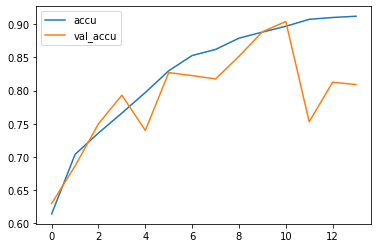

In [ ]:
plt.plot(result.history["accuracy"],label="accu")
plt.plot(result.history["val_accuracy"],label="val_accu")
plt.legend()

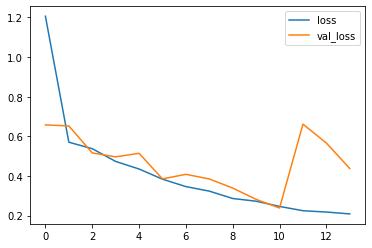

In [ ]:
plt.plot(result.history["loss"],label="loss")
plt.plot(result.history["val_loss"],label="val_loss")
plt.legend()

# Result

In [ ]:
y_hat = model.predict(X_test)
p = y_hat.argmax(axis=1)
misclassified = np.where(p != y_test)
correctclassify = np.where(p == y_test)
misclassified[0].shape[0]

382

ผิดทั้งหมด 382 ภาพ

In [ ]:
correctclassify[0].shape[0]/y_test.shape[0]

0.809

ซึ่งโมเดลได้ accuracy ที่ 80.9%

# Picture result

ตัวอย่างของภาพที่ผิดและถูกจากคำตอบที่ได้จาก model ไปเทียบกับคำตอบจริง

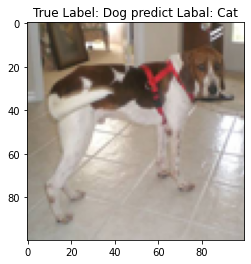

In [ ]:
i = np.random.choice(misclassified[0])
plt.imshow(X_test[i].reshape(WIDTH,HEIGHT,CHANNEL))
plt.title(f"True Label: {Label[int(y_test[i])]} predict Labal: {Label[int(p[i])]}")
plt.show()

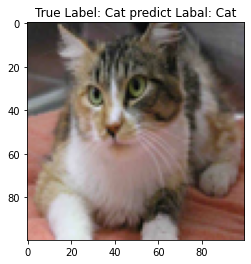

In [ ]:
i = np.random.choice(correctclassify[0])
plt.imshow(X_test[i].reshape(WIDTH,HEIGHT,CHANNEL))
plt.title(f"True Label: {Label[int(y_test[i])]} predict Labal: {Label[int(p[i])]}")
plt.show()